In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import numpy as np
import nltk
import operator
import string
import seaborn as sns

In [3]:
pth='/content/drive/MyDrive/datasets/crypto_class/'

df = pd.read_excel(f'{pth}final_1.xlsx')
df.sample()

,text,label,pred
154,Report Blasts Bitcoin Mining for Pollution—But...,0,0


In [4]:
# подготовка векторного представления текстов
vectTF = TfidfVectorizer(lowercase = True,
                         ngram_range=(1, 7), 
                         min_df=9
                         )

fit_corp = vectTF.fit_transform(df.text)

<Axes: >

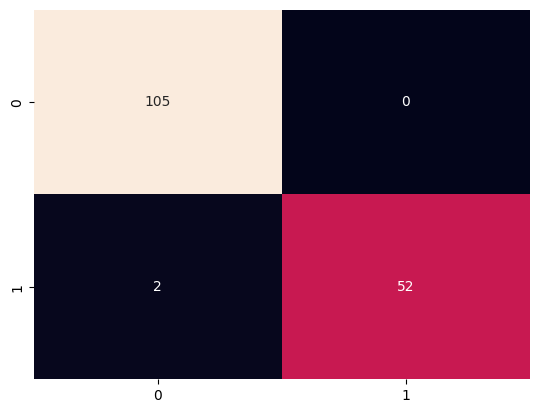

In [5]:
# обучение лёгкой модели
lr = LogisticRegression(solver= 'lbfgs', multi_class= 'multinomial')
lr.fit(fit_corp, df.label)
y_pred = lr.predict(fit_corp)
labels = sorted(df.label.unique())
# вывод матрицы ошибок
sns.heatmap(data= metrics.confusion_matrix(df.label, y_pred), annot=True, 
            fmt="d", cbar=False,
            xticklabels=labels, yticklabels=labels)

In [6]:
df['pred']= y_pred
df[df.label!= df.pred]

,text,label,pred
142,"The Arbitrum Foundation said that ARB, Arbritr...",1,0
152,DEX Aggregator ParaSwap Launches PSP Token on ...,1,0


In [7]:
df.loc[152, 'text']

'DEX Aggregator ParaSwap Launches PSP Token on Heels of ENS Airdrop Excitement After months of anticipation and a thorough “anti-Sybil” process, ParaSwap’s DAO is now live. By Andrew Thurman AccessTimeIconNov 15, 2021 at 9:37 p.m. (ieva swanson/Unsplash) (ieva swanson/Unsplash)  Consensus 2023 Logo BowTiedBull President BowTied Jungle The pseudonymous investor BowtiedBull explores the BowtiedJungle, where citizens swap advice on investing, job-seeking, ... Secure Your Seat After years of community badgering, a long-awaited token airdrop is now live. Exchange aggregator ParaSwap today announced the launch of its PSP governance token. The token is currently available to claim for some 20,000 eligible Ethereum addresses, and enables users to stake in liquidity pools in exchange for platform rewards, as well as participate in its newly formed decentralized autonomous organization (DAO) governance. ParaSwap famously resisted tokenizing for years, and as recently as last month the project’s 

Обучение тяжёлой модели

In [ ]:
pip install datasets transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 KB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 63.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 KB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 59.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 79.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 22.4 MB/s eta 0:00:00


In [ ]:
import torch
import pandas as pd
import numpy as np
from datasets import Dataset
from tqdm import tqdm
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from transformers import pipeline
from transformers import EarlyStoppingCallback
from transformers import (AutoTokenizer, AutoModelForSequenceClassification,
                          TrainingArguments, Trainer)

In [ ]:
def tokenize_function(examples):
    return tokenizer(examples["text"],
                     return_tensors='pt',
                     max_length=512,
                     truncation=True,
                     padding='max_length')

In [ ]:
def compute_metrics(eval_pred):
  logits, labels = eval_pred
  predictions = logits.argmax(axis=-1)
  metr = accuracy_score(predictions.tolist(), labels.tolist())
  return {'accuracy': metr}

In [ ]:
model_name=['roberta-large-mnli', 'microsoft/deberta-xlarge-mnli',
            'bert-base-uncased']
model_name= model_name[2]
tokenizer = AutoTokenizer.from_pretrained(model_name, num_labels=2)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

In [ ]:
pth='/content/drive/MyDrive/datasets/crypto_class/'
# df.to_excel(f'{pth}final_1.xlsx', index=False)
df = pd.read_excel(f'{pth}final_1.xlsx')
df.sample()

,text,label,pred
151,Binance Australia's Derivatives License Cancel...,0,0


In [ ]:
# подготовка датасета
train, test = train_test_split(df, test_size=0.2, random_state=42)
train_counts = train.value_counts(['label'])
print(train_counts)
df_train = train.copy()
valid, test = train_test_split(test, test_size=0.5, random_state=42)
val = valid.copy()
valid_counts = valid.value_counts(['label'])
test_counts = test.value_counts(['label'])
print(valid_counts)
print(test_counts)

train = Dataset.from_pandas(train)
tokenized_train = train.map(tokenize_function, batched=True)

valid = Dataset.from_pandas(valid)
tokenized_valid = valid.map(tokenize_function, batched=True)

test = Dataset.from_pandas(test)
test_dataset = test.map(tokenize_function, batched=True)

label
0        88
1        39
dtype: int64
label
0        9
1        7
dtype: int64
label
0        8
1        8
dtype: int64


Map:   0%|          | 0/127 [00:00<?, ? examples/s]

Map:   0%|          | 0/16 [00:00<?, ? examples/s]

In [ ]:
# обучение модели
training_args = TrainingArguments(#output_dir=f'{pth}test_trainer_log',
                                  output_dir='test_trainer_log',
                                  evaluation_strategy='epoch',
                                  per_device_train_batch_size=8,
                                  per_device_eval_batch_size=64,
                                  # num_train_epochs=10,
                                  save_strategy = "epoch",
                                  # report_to="wandb",
                                  load_best_model_at_end=True
                                  )

trainer = Trainer(model=model,
				  args=training_args,
				  train_dataset=tokenized_train,
				  eval_dataset=tokenized_valid,
					tokenizer=tokenizer,
					# callbacks=[EarlyStoppingCallback(4)],
				  compute_metrics=compute_metrics)

trainer.train()
# wandb.finish()

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.698479,0.625000
2,No log,0.410290,0.875000
3,No log,0.362224,0.875000


TrainOutput(global_step=48, training_loss=0.2787786324818929, metrics={'train_runtime': 53.1959, 'train_samples_per_second': 7.162, 'train_steps_per_second': 0.902, 'total_flos': 100245312092160.0, 'train_loss': 0.2787786324818929, 'epoch': 3.0})

In [ ]:
eval_results = trainer.evaluate(test_dataset)
print(eval_results)

Map:   0%|          | 0/16 [00:00<?, ? examples/s]

{'eval_loss': 0.21794675290584564, 'eval_accuracy': 0.9375, 'eval_runtime': 0.579, 'eval_samples_per_second': 27.634, 'eval_steps_per_second': 1.727, 'epoch': 3.0}


In [ ]:
# Сохранение модели
date = str(pd.to_datetime('today'))[:-16]
pth='/content/drive/MyDrive/datasets/crypto_class/'
md_pth=f"{pth}model{date}"
trainer.save_model(md_pth)

In [ ]:
# загрузка модели для инференса
md_pth='/content/drive/MyDrive/datasets/crypto_class/model2023-04-08'
pipe = pipeline("text-classification", md_pth)

In [ ]:
test = df.copy()
test['prediction']=''
with torch.inference_mode():
  for id in test.index:
    text = test.loc[id, 'text']
    logits = pipe(text)
    test.loc[id, 'prediction'] = logits[0]['label'][-1]

# test.to_excel(f"{pth}client_pred_{date}.xlsx", index=False)

In [ ]:
test[test['label'] != test['prediction']]

,text,label,pred,prediction
0,Orbofi AI is the most sophisticated AI-generat...,1,1,1
1,Arbitrum is a layer 2 solution designed to imp...,1,1,2
2,DEEP42 AIRDROP ALERT 📢 🔹Community governed ga...,1,1,1
3,It’s GHO time! $GHO is now claimable on Ethere...,0,0,0
4,Are you ready to join the metaverse revolution...,1,1,2
...,...,...,...,...
154,Report Blasts Bitcoin Mining for Pollution—But...,0,0,2
155,Arbitrum’s Airdrop Is Just Around the Corner—H...,1,0,2
156,CryptoTanks is a fast-paced free-to-play game ...,1,1,1
157,ZKasino is a decentralized casino built on Lay...,1,1,1


In [ ]:
test.to_excel(f"{pth}df_pred_1.xlsx", index=False)

In [ ]:
pth1='/content/drive/MyDrive/datasets/crypto_class/unmarked_database_mixed_2.xlsx'
unmarked_2 = pd.read_excel(pth1)

In [ ]:
unmarked_2.head()

,text,prediction
0,"Apr 4\n💰$10,000 Giveaway💰\n\n@RDNTCapital\n $R...",1.0
1,Crypto and blockchain technology have changed ...,0.0
2,Crypto's association with criminals stemmed mo...,0.0
3,Time to look at this month's market insights!\...,0.0
4,Reminder - wallet maintenance for the Ethereum...,0.0


In [ ]:
# Ещё один способ загрузки модели для инференса
model_pth = '/content/drive/MyDrive/datasets/crypto_class/model2023-04-08/'
model = AutoModelForSequenceClassification.from_pretrained(model_pth)
tok_pth='/content/drive/MyDrive/datasets/crypto_class/model2023-04-08/'
tokenizer = AutoTokenizer.from_pretrained(tok_pth)

In [ ]:
test = unmarked_2.copy()

test['prediction']=2
with torch.inference_mode():
  for id in test.index:
    text = test.loc[id, 'text']
    inputs = tokenizer(text,
                       return_tensors="pt",
                       max_length=512,
                       truncation=True,
                       padding='max_length')
    
    logits = model(**inputs).logits
    test.loc[id, 'prediction'] = logits.argmax().item()

In [ ]:
test.sample(10)

,text,prediction,pred ligth model
19,This week in DeFi 🟣 @0xPolygonLabs releases Po...,0,0
6,Take a break from eating chocolate this Easter...,0,0
43,NFT Workx is a Web3 eCommerce platform and mob...,1,1
12,"As part of our Ramadan efforts, we collected m...",0,0
4,Reminder - wallet maintenance for the Ethereum...,0,0
36,"If you had $3,000 in BNB, how would you suppor...",0,0
30,"Historically, bitcoin's price increased by 2 d...",0,0
48,Splinterlands (SPS) airdrop$500 worth of SPS t...,1,1
24,Will try to keep 2023 simple. Spend more time ...,0,0
1,Crypto and blockchain technology have changed ...,0,0


In [ ]:
# test = pd.read_excel(f"{pth}unmarked_2_pred_1.xlsx")

In [ ]:
# Предсказание лёгкой моделью
fit_corp = vectTF.transform(test.text.str.lower())
y_pred = lr.predict(fit_corp)
test['pred ligth model']=y_pred

In [ ]:
# сохранение предсказаний в эксель
test.to_excel(f"{pth}unmarked_2_pred_1.xlsx", index=False)